# PokerMate - Stage 3: Poker Hand Inference (Local)

----

# 1. Setup

In [1]:
#
# Initialize Basic File paths...
#

import os
root_dir_fp    = "./"
data_fp        = os.path.join(root_dir_fp, "data")
model_fp       = os.path.join(root_dir_fp, "models")
output_fp      = os.path.join(root_dir_fp, "output")

#
# Initialize Configuration File paths...
#
model_save_fp         = model_fp + '/pokermate_stage2_yolo8.pt' 

# 2. Imports

In [2]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import Image as ImageDisplay
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from pathlib import Path
from ultralytics import YOLO
%matplotlib inline

# 3. Model Prediction

In [3]:
## Loading fine-tuned model for cards:

model = YOLO(model_save_fp)

In [4]:
def model_predict(input_img_fp, output_img_fp):
    
    # Read the original image
    original_img = cv2.imread(input_img_fp)
    
    # Save the original image
    cv2.imwrite("original_image.jpg", original_img)
    
    # Model prediction
    results = model(input_img_fp)
    
    # Display the original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Display the model prediction on the original image
    plt.subplot(1, 3, 2)
    y_hat = []
    for r in results:
        #print(r.boxes)
        try:
          # GPU VERSION
          labels = set(np.array(r.boxes.cls).astype(int))
        except Exception as e:
          # CPU VERSION
          labels = set(np.array(r.boxes.cls.cpu()).astype(int))
        class_labels = [model.names.get(x) for x in labels]
        
        y_hat+=class_labels
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        #im = im.resize((6000, 6000))
        plt.imshow(im)
        plt.title("Model Prediction")
        plt.axis('off')

        # Save the annotated image
        im.save(output_img_fp)

    # Print labels found in the detected image
    print("\n*** Labels found in the detected image: ***\n")
    print(set(y_hat))
    plt.show()
    return y_hat

- great accuracy

# 4. Poker Hand Logic

Poker Hand Evaluation:


https://github.com/ihendley/treys

In [5]:
## !pip install treys

from treys import Card
from treys import Evaluator

In [6]:
def check_hand(cards):
    
    # converting to "trey" format
    """
    {'2': 0,
    '3': 1,
    '4': 2,
    '5': 3,
    '6': 4,
    '7': 5,
    '8': 6,
    '9': 7,
    'T': 8,
    'J': 9,
    'Q': 10,
    'K': 11,
    'A': 12}
    """
    try:
        trey_cards = []
        for card in cards:
            if "10" in card:
                rank = "T"
                suite = card[2]
            else:
                rank = card[0]
                suite = card[1]
            trey_cards.append(f"{rank}{suite.lower()}")

        board = []
        hand = []
        for card in trey_cards:
            board.append(Card.new(card))

        # Evaluate poker hand
        evaluator = Evaluator()
        deck_score = evaluator.evaluate(board, hand)
        deck_class = evaluator.get_rank_class(deck_score)
        #print("Hand rank = %d (%s)" % (deck_score, evaluator.class_to_string(deck_class)))
        return evaluator.class_to_string(deck_class)
    except Exception as e:
        return "Unknown"


# TEST
check_hand(["KH", "AH", "QH", "JH", "10H"])   # Royal Flush
check_hand(["QC", "JC", "10C", "9C", "8C"])   # Straight Flush
check_hand(["5C", "5S", "5H", "5D", "QH"])    # Four of a Kind
check_hand(["2H", "2D", "2S", "10H", "10C"])  # Full House
check_hand(["2D", "KD", "7D", "6D", "5D"])    # Flush
check_hand(["JC", "10H", "9C", "8C", "7D"])   # Straight
check_hand(["10H", "10C", "10D", "2D", "5S"])  # Three of a Kind
check_hand(["KD", "KH", "5C", "5S", "6D"])    # Two Pair
check_hand(["2D", "2S", "9C", "KD", "10C"])   # Pair
check_hand(["KD", "5H", "2D", "10C", "JH"])   # High Card

'High Card'


image 1/1 /Users/pranjalpathak/Library/CloudStorage/GoogleDrive-pranjalpathak.iitbhuvns@gmail.com/My Drive/WORK/Data Science/7.  Neural Networks and Deep Learning/resources/CSCI 5922 - Neural Nets and Deep Learning/ASSIGNMENTS/PROJECT/source/ml/testing/pokerhand1.jpg: 288x416 2 10Hs, 1 4H, 2 7Hs, 1 AH, 1 JH, 1 KH, 1 QH, 393.3ms
Speed: 3.2ms preprocess, 393.3ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 416)



*** Labels found in the detected image: ***

{'10H', '7H', 'JH', 'QH', '4H', 'AH', 'KH'}


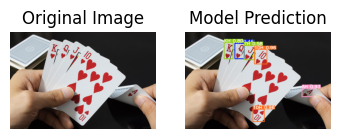

'Royal Flush'

In [7]:
cards = model_predict("testing/pokerhand1.jpg", "testing/pred__pokerhand1.jpg")
check_hand(cards)


image 1/1 /Users/pranjalpathak/Library/CloudStorage/GoogleDrive-pranjalpathak.iitbhuvns@gmail.com/My Drive/WORK/Data Science/7.  Neural Networks and Deep Learning/resources/CSCI 5922 - Neural Nets and Deep Learning/ASSIGNMENTS/PROJECT/source/ml/testing/pokerhand2.jpg: 288x416 1 10H, 1 AH, 1 KH, 1 QH, 380.6ms
Speed: 2.6ms preprocess, 380.6ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 416)



*** Labels found in the detected image: ***

{'AH', '10H', 'QH', 'KH'}


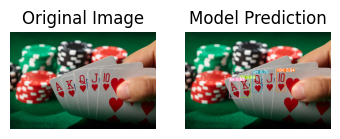

'Unknown'

In [8]:
cards = model_predict("testing/pokerhand2.jpg", "testing/pred__pokerhand2.jpg")
check_hand(cards)


image 1/1 /Users/pranjalpathak/Library/CloudStorage/GoogleDrive-pranjalpathak.iitbhuvns@gmail.com/My Drive/WORK/Data Science/7.  Neural Networks and Deep Learning/resources/CSCI 5922 - Neural Nets and Deep Learning/ASSIGNMENTS/PROJECT/source/ml/testing/pokerhand3.jpg: 256x416 5 10Ds, 2 ADs, 1 JD, 2 KDs, 2 QDs, 358.7ms
Speed: 2.3ms preprocess, 358.7ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)



*** Labels found in the detected image: ***

{'QD', '10D', 'JD', 'KD', 'AD'}


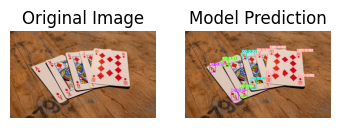

'Royal Flush'

In [9]:
cards = model_predict("testing/pokerhand3.jpg", "testing/pred__pokerhand3.jpg")
check_hand(cards)


image 1/1 /Users/pranjalpathak/Library/CloudStorage/GoogleDrive-pranjalpathak.iitbhuvns@gmail.com/My Drive/WORK/Data Science/7.  Neural Networks and Deep Learning/resources/CSCI 5922 - Neural Nets and Deep Learning/ASSIGNMENTS/PROJECT/source/ml/testing/pokerhand4.jpg: 288x416 2 10Cs, 2 4Hs, 2 6Hs, 1 7C, 2 7Hs, 1 7S, 2 9Hs, 1 AH, 385.2ms
Speed: 2.7ms preprocess, 385.2ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 416)



*** Labels found in the detected image: ***

{'7H', '7C', '7S', '9H', '10C', '6H', '4H', 'AH'}


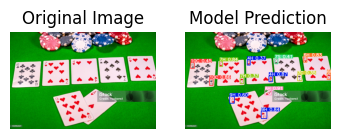

'Unknown'

In [10]:
cards = model_predict("testing/pokerhand4.jpg", "testing/pred__pokerhand4.jpg")
check_hand(cards)

----
----